<a href="https://colab.research.google.com/github/daveking63/Bollywood/blob/master/Milestone_1_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving verdict_ranks.txt to verdict_ranks (5).txt
Saving bw_success_measures.txt to bw_success_measures (10).txt
Saving india_cpi_2020.txt to india_cpi_2020 (10).txt


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import io
df_sm = pd.read_csv(io.BytesIO(data_to_load['bw_success_measures.txt']),sep='\t')

In [5]:
# Total sample size, variables, missing values, data types for download file
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   film           2963 non-null   object 
 1   id             2963 non-null   int64  
 2   rank           2963 non-null   int64  
 3   release_date   2963 non-null   object 
 4   verdict        2963 non-null   object 
 5   budget         2797 non-null   float64
 6   first_week     2466 non-null   float64
 7   tot_net_gross  2963 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 185.3+ KB


In [6]:
# Summary of aggregate measures for key financial (response/dependent) variables
# mean, std, min ... all in Indian Crores (10M rupees)

df_sm[['budget','first_week','tot_net_gross']].describe()

,budget,first_week,tot_net_gross
count,2797.000000,2466.000000,2963.00000
mean,13.391911,9.523644,12.64578
std,27.234132,22.247333,32.94777
min,0.080000,0.003000,0.00500
25%,1.250000,0.435000,0.23350
50%,4.500000,1.871500,1.67500
75%,14.000000,6.737500,8.96750
max,575.000000,246.470000,510.36000


In [7]:
# As a precursor to handling missing data create and
# insert the year the film was made and a numerical
# variable representing the values for the ordinal variable 'verdict'

# Convert the release_date to 'datetime', then insert
# a new column release_year (int)

import datetime
release_year = pd.Series([])
df_sm['release_date'] = pd.to_datetime(df_sm['release_date'])
release_year = df_sm['release_date'].map(lambda x: int(x.strftime('%Y')))
df_sm.insert(4, "release_year", release_year)
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   film           2963 non-null   object        
 1   id             2963 non-null   int64         
 2   rank           2963 non-null   int64         
 3   release_date   2963 non-null   datetime64[ns]
 4   release_year   2963 non-null   int64         
 5   verdict        2963 non-null   object        
 6   budget         2797 non-null   float64       
 7   first_week     2466 non-null   float64       
 8   tot_net_gross  2963 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 208.5+ KB


In [8]:
# Insert a new variable 'verdict_ranking' that assigns a numerical value 1-9
# to the ordinal variable 'verdict' whose string values are:
# Disaster, Flop, Below Average, Average, Semi Hit, Hit, Super Hit, Blockbuster, All Time Blockbuster

# read file containing verdicts and associated verdict ranks
df_verdicts = pd.read_csv(io.BytesIO(data_to_load['verdict_ranks.txt']),sep='\t')

# create a dictionary associating verdicts with verdict ranks
verdict_dict = dict(zip(df_verdicts.verdict, df_verdicts.verdict_rank))

verdict_rank_list = []
for i in range(df_sm.shape[0]):
  vrank = verdict_dict[df_sm.loc[i, 'verdict']]
  verdict_rank_list.append(vrank)

df_sm.insert(6, "verdict_rank", verdict_rank_list)
print(df_sm.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   film           2963 non-null   object        
 1   id             2963 non-null   int64         
 2   rank           2963 non-null   int64         
 3   release_date   2963 non-null   datetime64[ns]
 4   release_year   2963 non-null   int64         
 5   verdict        2963 non-null   object        
 6   verdict_rank   2963 non-null   int64         
 7   budget         2797 non-null   float64       
 8   first_week     2466 non-null   float64       
 9   tot_net_gross  2963 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 231.6+ KB
None


In [14]:
# Handling Missing Data

# Option 1:
# Drop rows with missing budget or first_week
# There are 166 rows or films missing budget data and 497 missing first_week revenues
# Decision is to drop the rows with missing first_week revenues

df_sm_miss = df_sm.copy(deep=True)
df_sm_miss = df_sm_miss.dropna(subset=['first_week'])
df_sm_miss.index = range(len(df_sm_miss.index))
print(df_sm_miss.info())

df_sm_miss_agg = df_sm_miss[['budget','first_week','tot_net_gross']].describe()
df_sm_miss_agg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   film           2466 non-null   object        
 1   id             2466 non-null   int64         
 2   rank           2466 non-null   int64         
 3   release_date   2466 non-null   datetime64[ns]
 4   release_year   2466 non-null   int64         
 5   verdict        2466 non-null   object        
 6   verdict_rank   2466 non-null   int64         
 7   budget         2354 non-null   float64       
 8   first_week     2466 non-null   float64       
 9   tot_net_gross  2466 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 192.8+ KB
None


,budget,first_week,tot_net_gross
count,2354.000000,2466.000000,2466.000000
mean,15.857508,9.523644,15.169829
std,29.033149,22.247333,35.586895
min,0.100000,0.003000,0.023000
25%,2.500000,0.435000,0.635750
50%,6.000000,1.871500,3.029000
75%,18.000000,6.737500,12.328750
max,575.000000,246.470000,510.360000


In [17]:
# Option 2 - imputing values for rows missing
# budget values. The imputed values are based on
# mean budget values for each 'verdict_rank'
print('Original dataframe')
print(df_sm.groupby('verdict_rank')[['budget']].agg(['mean','median','count']),'\n')
print('With rows missing first_week revenues')
print(df_sm_miss.groupby('verdict_rank')[['budget']].agg(['mean','median','count']))

Original dataframe
                 budget             
                   mean median count
verdict_rank                        
1              5.793394   2.00  1560
2             16.177686   7.75   644
3             17.383663   9.50   101
4             19.617803  11.00   132
5             26.372549  13.00   102
6             33.639015  20.50   132
7             41.203472  24.50    72
8             63.755952  41.50    42
9             73.416667  48.00    12 

With rows missing first_week revenues
                 budget             
                   mean median count
verdict_rank                        
1              7.819864    4.0  1140
2             16.558156    8.0   629
3             18.088144    9.5    97
4             20.068217   12.0   129
5             26.631188   13.0   101
6             33.639015   20.5   132
7             41.203472   24.5    72
8             63.755952   41.5    42
9             73.416667   48.0    12


In [18]:
df_sm_miss['budget'].isna().sum()


112

In [19]:
# Substitute median budget from verdict_rank for missing budget values
df_sm_miss['budget'] = df_sm_miss['budget'].fillna(df_sm_miss.groupby('verdict_rank')['budget'].transform('median'))
#df_sm_miss['budget'] = df_sm_miss.groupby('verdict')['budget'].transform(lambda grp: grp.fillna(np.median(grp)))
df_sm_miss_agg = df_sm_miss[['budget','first_week','tot_net_gross']].describe()
df_sm_miss_agg

,budget,first_week,tot_net_gross
count,2466.000000,2466.000000,2466.000000
mean,15.329106,9.523644,15.169829
std,28.470193,22.247333,35.586895
min,0.100000,0.003000,0.023000
25%,2.500000,0.435000,0.635750
50%,5.750000,1.871500,3.029000
75%,17.000000,6.737500,12.328750
max,575.000000,246.470000,510.360000


In [20]:
df_sm_agg = df_sm[['budget','first_week', 'tot_net_gross']].describe()
df_agg = pd.concat([df_sm_miss_agg, df_sm_agg], axis=1, keys=('Missing','Original'))
df_agg

Missing               ...     Original              
            budget   first_week  ...   first_week tot_net_gross
count  2466.000000  2466.000000  ...  2466.000000    2963.00000
mean     15.329106     9.523644  ...     9.523644      12.64578
std      28.470193    22.247333  ...    22.247333      32.94777
min       0.100000     0.003000  ...     0.003000       0.00500
25%       2.500000     0.435000  ...     0.435000       0.23350
50%       5.750000     1.871500  ...     1.871500       1.67500
75%      17.000000     6.737500  ...     6.737500       8.96750
max     575.000000   246.470000  ...   246.470000     510.36000

[8 rows x 6 columns]

In [21]:
# Adjusting for Currency Inflation

In [22]:
# read consumer price index ratio for years between 1994 & 2019 with base year of 2020
df_cpi = pd.read_csv(io.BytesIO(data_to_load['india_cpi_2020.txt']),sep='\t')

# create a dictionary of CPI ratios with year as key
dict_cpi = dict(zip(df_cpi.Year, df_cpi.CPI_Ratio))
print(dict_cpi)

{1994: 5.77, 1995: 5.27, 1996: 4.8, 1997: 4.35, 1998: 4.09, 1999: 3.55, 2000: 3.53, 2001: 3.41, 2002: 3.25, 2003: 3.15, 2004: 3.03, 2005: 2.92, 2006: 2.77, 2007: 2.6, 2008: 2.46, 2009: 2.25, 2010: 1.95, 2011: 1.78, 2012: 1.68, 2013: 1.51, 2014: 1.38, 2015: 1.3, 2016: 1.23, 2017: 1.2, 2018: 1.15, 2019: 1.1, 2020: 1.0}


In [23]:
# adjust budget, first_week, tot_net_gross for inflation
for i in range(df_sm_miss.shape[0]):
  yr = df_sm_miss.loc[i,'release_year']
  cpi_ratio = dict_cpi[yr]
  # df_sm.loc[i,'cpi_ratio'] = cpi_ratio
  df_sm_miss.loc[i,'budget_adjust'] = round(df_sm_miss.loc[i,'budget']*cpi_ratio,3)
  df_sm_miss.loc[i,'first_week_adjust'] = round(df_sm_miss.loc[i,'first_week']*cpi_ratio,3)
  df_sm_miss.loc[i,'tot_net_gross_adjust'] = round(df_sm_miss.loc[i,'tot_net_gross']*cpi_ratio,3)

In [24]:
 df_sm_miss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2466 entries, 0 to 2465
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   film                  2466 non-null   object        
 1   id                    2466 non-null   int64         
 2   rank                  2466 non-null   int64         
 3   release_date          2466 non-null   datetime64[ns]
 4   release_year          2466 non-null   int64         
 5   verdict               2466 non-null   object        
 6   verdict_rank          2466 non-null   int64         
 7   budget                2466 non-null   float64       
 8   first_week            2466 non-null   float64       
 9   tot_net_gross         2466 non-null   float64       
 10  budget_adjust         2466 non-null   float64       
 11  first_week_adjust     2466 non-null   float64       
 12  tot_net_gross_adjust  2466 non-null   float64       
dtypes: datetime64[ns](

In [25]:
#df_sm_miss.loc[0:,'budget':].describe()
df_sm_miss[['budget','budget_adjust','first_week','first_week_adjust','tot_net_gross','tot_net_gross_adjust']].describe()

,budget,budget_adjust,first_week,first_week_adjust,tot_net_gross,tot_net_gross_adjust
count,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
mean,15.329106,27.986575,9.523644,16.309522,15.169829,28.206402
std,28.470193,37.761845,22.247333,29.969239,35.586895,51.562994
min,0.100000,0.195000,0.003000,0.006000,0.023000,0.082000
25%,2.500000,6.818000,0.435000,1.126750,0.635750,1.588750
50%,5.750000,15.600000,1.871500,5.425000,3.029000,8.363500
75%,17.000000,34.100000,6.737500,17.207250,12.328750,31.681000
max,575.000000,661.250000,246.470000,295.764000,510.360000,612.432000


In [26]:
df_sm_miss.head()

,film,id,rank,release_date,release_year,verdict,verdict_rank,budget,first_week,tot_net_gross,budget_adjust,first_week_adjust,tot_net_gross_adjust
0,Hum Aapke Hain Koun..!,11,1,1994-08-05,1994,All Time Blockbuster,9,6.25,0.680,72.465,36.062,3.924,418.123
1,Bahubali 2 - The Conclusion,3517,2,2017-04-28,2017,All Time Blockbuster,9,195.00,246.470,510.360,234.000,295.764,612.432
2,Gadar - Ek Prem Katha,657,3,2001-06-15,2001,All Time Blockbuster,9,19.00,9.280,76.880,64.790,31.645,262.161
3,Dilwale Dulhania Le Jayenge,3036,4,1995-10-20,1995,All Time Blockbuster,9,4.00,3.373,53.313,21.080,17.776,280.960
4,Raja Hindustani,2737,5,1996-11-11,1996,All Time Blockbuster,9,5.75,3.650,43.145,27.600,17.520,207.096


In [28]:
# aggregate stats for all variables/columns
df_sm_miss.describe(include = 'all')

,film,id,rank,release_date,release_year,verdict,verdict_rank,budget,first_week,tot_net_gross,budget_adjust,first_week_adjust,tot_net_gross_adjust
count,2466,2466.000000,2466.000000,2466,2466.000000,2466,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000,2466.000000
unique,2446,NaN,NaN,1264,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Hulchul,NaN,NaN,2009-08-28 00:00:00,NaN,Disaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,6,NaN,1247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,1994-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-12-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1814.210057,1336.409165,NaN,2006.885645,NaN,2.258719,15.329106,9.523644,15.169829,27.986575,16.309522,28.206402
std,NaN,1329.141953,833.866127,NaN,7.141563,NaN,1.870551,28.470193,22.247333,35.586895,37.761845,29.969239,51.562994
min,NaN,1.000000,1.000000,NaN,1994.000000,NaN,1.000000,0.100000,0.003000,0.023000,0.195000,0.006000,0.082000
25%,NaN,630.250000,633.250000,NaN,2001.000000,NaN,1.000000,2.500000,0.435000,0.635750,6.818000,1.126750,1.588750


In [ ]:
# Additional Measures of Success

In [29]:
# Additional Measure 1: ROI
# roi for first_week_adjust, tot_net_gross_adjust
df_ln = df_sm_miss.shape[0]
for i in range(0,df_ln):
  bud = df_sm_miss.loc[i,'budget_adjust']
  first = df_sm_miss.loc[i,'first_week_adjust']
  tot = df_sm_miss.loc[i, 'tot_net_gross_adjust']
  df_sm_miss.loc[i,'first_week_roi'] = ((first - bud)/bud) * 100
  df_sm_miss.loc[i,'tot_net_gross_roi'] = ((tot - bud)/bud) * 100

#df_sm_miss.info()
df_sm_miss.loc[0:,['first_week_roi','tot_net_gross_roi']].describe()

,first_week_roi,tot_net_gross_roi
count,2466.000000,2466.000000
mean,-56.562538,-20.780800
std,34.718358,84.676846
min,-99.628205,-99.237179
25%,-84.028507,-79.738923
50%,-62.462176,-41.536354
75%,-39.015180,9.122212
max,170.769231,1232.827324


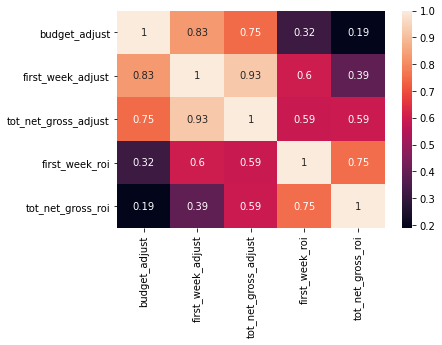

In [30]:
corr_list = ['budget_adjust','first_week_adjust','tot_net_gross_adjust', 'first_week_roi','tot_net_gross_roi']
corr = pd.DataFrame()
for var1 in corr_list:
    for var2 in corr_list:
        corr.loc[var1, var2] = df_sm_miss.corr().loc[var1, var2]
sns.heatmap(corr, annot=True);

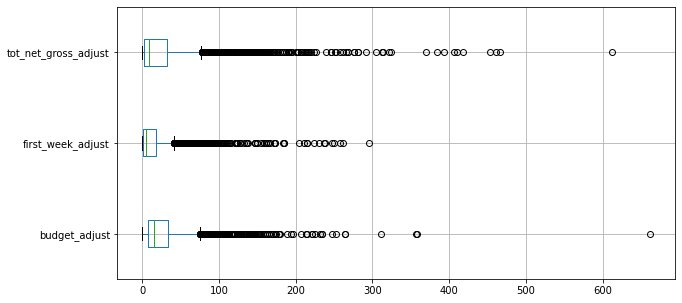

In [31]:
# box_plot of budget_adjust, first_week_adjust, tot_net_gross_adjust
fig, ax = plt.subplots(figsize=(10, 5))
df_sm_miss.loc[0:,['budget_adjust','first_week_adjust','tot_net_gross_adjust']].boxplot(vert=False);

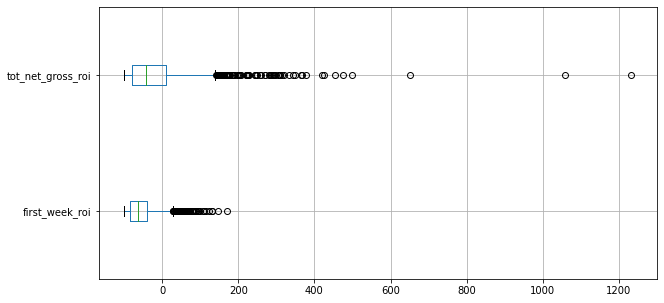

In [32]:
# box_plot of budget_adjust, first_week_adjust, tot_net_gross_adjust
fig, ax = plt.subplots(figsize=(10, 5))
df_sm_miss.loc[0:,['first_week_roi','tot_net_gross_roi']].boxplot(vert=False);

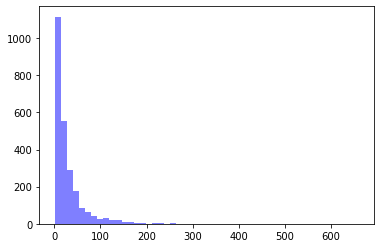

In [33]:
num_bins = 50
col_sel = ['budget_adjust','first_week_adjust','tot_met_gross_adjust']
x = df_sm_miss.budget_adjust
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)

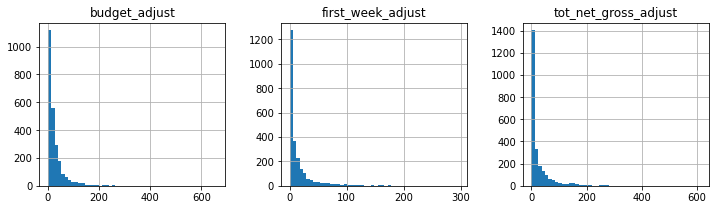

In [34]:
df_sm_miss.loc[0:,['budget_adjust','first_week_adjust','tot_net_gross_adjust']].hist(bins=50,figsize=(12,3), layout=(1,3));

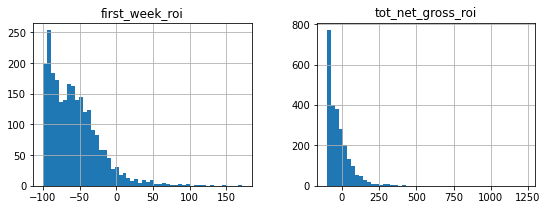

In [35]:
df_sm_miss.loc[0:,['first_week_roi','tot_net_gross_roi']].hist(bins=50,figsize=(9,3), layout=(1,2));

In [36]:
from scipy.stats import kurtosis
from scipy.stats import skew

col_sel = ['budget_adjust','first_week_adjust','tot_net_gross_adjust','first_week_roi','tot_net_gross_roi']
for var in col_sel:
  data = df_sm_miss[var]
  print(var, round(skew(data),3), round(kurtosis(data),3))


budget_adjust 4.598 43.436
first_week_adjust 3.999 21.114
tot_net_gross_adjust 4.034 23.475
first_week_roi 1.54 3.995
tot_net_gross_roi 3.815 34.852


In [37]:
def log_trans(column):
    y = np.log(column + 1)
    return y

In [39]:
df_sm_miss.loc[0:,'budget_log'] = log_trans(df_sm_miss.budget_adjust)
df_sm_miss.loc[0:,'first_week_log'] = log_trans(df_sm_miss.first_week_adjust)
df_sm_miss.loc[0:,'tot_net_gross_log'] = log_trans(df_sm_miss.tot_net_gross_adjust)
df_sm_miss.loc[0:,['budget_log','first_week_log','tot_net_gross_log']].describe()

,budget_log,first_week_log,tot_net_gross_log
count,2466.000000,2466.000000,2466.000000
mean,2.827153,1.950363,2.303805
std,1.031664,1.311738,1.491144
min,0.178146,0.005982,0.078811
25%,2.056429,0.754590,0.951175
50%,2.809403,1.860195,2.236819
75%,3.558201,2.901820,3.486793
max,6.495643,5.692937,6.419069


In [40]:
col_sel = ['budget_log','first_week_log','tot_net_gross_log']
for var in col_sel:
  data = df_sm_miss[var]
  print(var, round(skew(data),3), round(kurtosis(data),3))

budget_log 0.154 -0.417
first_week_log 0.406 -0.743
tot_net_gross_log 0.276 -0.978


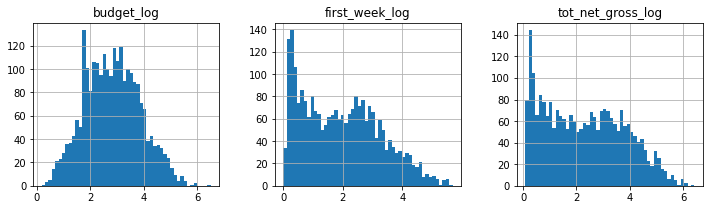

In [41]:
df_sm_miss.loc[0:,['budget_log','first_week_log','tot_net_gross_log']].hist(bins=50,figsize=(12,3), layout=(1,3));

In [43]:
def znorm(df_col):
  df_z = (df_col - df_col.mean())/df_col.std()
  return df_z

def minmax_norm(df_col):
  df_mm = (df_col -df_col.min())/(df_col.max()-df_col.min())
  return df_mm

In [ ]:
df_sm_miss.loc[0:,'budget_log_norm'] = minmax_norm(df_sm.budget_log)
df_sm_miss.loc[0:,'first_week_log_norm'] = minmax_norm(df_sm.first_week_log)
df_sm_miss.loc[0:,'tot_net_gross_log_norm'] = minmax_norm(df_sm.tot_net_gross_log)

df_sm_miss.loc[0:,['budget_log_norm','first_week_log_norm','tot_net_gross_log_norm']].describe()

In [ ]:
col_sel = ['budget_log_norm','first_week_log_norm','tot_net_gross_log_norm']
for var in col_sel:
  data = df_sm[var]
  print(var, round(skew(data),3), round(kurtosis(data),3))

In [ ]:
df_sm.loc[0:,['budget_log_norm','first_week_log_norm','tot_net_gross_log_norm']].hist(bins=50,figsize=(12,3), layout=(1,3));

In [ ]:
# Success where measures are ordinal variables - converted to numerical values

# first measure based on rankings assigned by BOI (partially based on gross revenues and roi)
# verdict_rank - 1-9 based on verdict ('Disaster' = 1 ... 'All Time Blockbuster' = 9)
 
verdict_dict = {'All Time Blockbuster':9,'Blockbuster':8, 'Super Hit':7, 'Hit':6, 'Semi Hit':5, 'Average':4, 'Below Average':3, 'Flop':2, 'Disaster':1}

for i in range(0,df_ln):
  df_sm.loc[i,'verdict_rank'] = verdict_dict[df_sm.loc[i,'verdict']]

# Frequency of verdict_ranks in sorted order
df_sm.verdict_rank.value_counts(sort=False)

In [ ]:
ax = sns.countplot(x="verdict_rank",data=df_sm)

In [ ]:
# Success based on profit = 
for i in range(0,df_ln):
  revenue = df_sm.loc[i,'tot_net_gross_adjust']
  budget = df_sm.loc[i,'budget_adjust']
  profit = (.8 * revenue) - budget
  if profit > 0:
    df_sm.loc[i,'success_flop'] = 1 # success
  else:
    df_sm.loc[i,'success_flop'] = 0 # flop

df_sm.success_flop.value_counts()

In [ ]:
ax = sns.countplot(x="success_flop",data=df_sm);

In [ ]:
# Success measured by profit ratio = gross_rev/budget
# 3 ordinal values: low = profit ratio - < 1.0; moderate - profit ratio >= 1.0 and < 2.0; high - >= 2.0

for i in range(0,df_ln):
  revenue = df_sm.loc[i,'tot_net_gross_adjust']
  budget = df_sm.loc[i,'budget_adjust']
  profit_ratio = revenue/budget
  if profit_ratio < 1.0:
    df_sm.loc[i,'profit_ratio'] = 1 # low grossing
  elif profit_ratio >= 2.0:
    df_sm.loc[i,'profit_ratio'] = 3 # high grossing
  else:
    df_sm.loc[i,'profit_ratio'] = 2 # moderate grossing

df_sm.profit_ratio.value_counts()

In [ ]:
ax = sns.countplot(x="rev_grossing",data=df_sm);

In [ ]:
var_list = ['success_flop','rev_grossing','verdict_rank','success_flop','rev_grossing']
for i in range(0,2):
  var1= var_list[i]
  for j in range(i+1,3):
    var2 = var_list[j]
    print(pd.crosstab(df_sm.loc[0:,var1],df_sm.loc[0:,var2], dropna = False, margins = True),'\n')


In [ ]:
from scipy import stats

corr = pd.DataFrame()
for var1 in var_list:
    for var2 in corr_list:
        rho, pval = stats.spearmanr(df_sm.loc[0:,var1],df_sm.loc[0:,var2])
        corr.loc[var1, var2] = rho
sns.heatmap(corr, annot=True);


In [ ]:
# success_flop, rev_grossing, verdict_rank by 5 year groups
yr_limits = [(1994,2000,1995),(2000,2005,2000),(2005,2010, 2005),(2010,2015,2010),(2015,2020,2015)]

for i in range(0,df_ln):
  for yr_tup in yr_limits:
    if (df_sm.loc[i,'release_year'] >= yr_tup[0] and df_sm.loc[i,'release_year'] < yr_tup[1]):
      #print(i,df_sm.loc[i,'release_year'],yr_tup[0],yr_tup[2])
      df_sm.loc[i,'5yr'] = yr_tup[2]
      
df_sm.groupby('5yr')['5yr'].count()


In [ ]:
# regardless of the ordinal variable, the percentage of poorly performing movies remained relatively
# the same from 2000 on.
pd.crosstab(df_sm.loc[0:,'5yr'],df_sm.loc[0:,'verdict_rank'], dropna = False, margins = True, normalize='index')

In [ ]:
df_sm.groupby('5yr')['tot_net_gross_adjust','budget_adjust','tot_net_gross_roi'].mean()